### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

### 2. Load Dataset

In [2]:
car_dataframe = pd.read_csv('car_data_set.csv')

In [3]:
brand = car_dataframe['name'].apply(lambda x: x.split(' ')[0])
car_dataframe.insert(1,"brand", brand)

### 3. Understanding and Data Preparation

In [4]:
car_dataframe.head(10)

,name,brand,selling_price,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,Maruti,450000,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,370000,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,Honda,158000,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,Hyundai,225000,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,Maruti,130000,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,Hyundai,440000,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,Maruti,96000,2007,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,Maruti,45000,2001,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,Toyota,350000,2011,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,Ford,200000,2013,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [5]:
car_dataframe.describe()

,selling_price,year,km_driven,seats
count,8.127000e+03,8127.000000,8.127000e+03,7906.000000
mean,6.383405e+05,2013.805709,6.981580e+04,5.416393
std,8.062792e+05,4.041597,5.655304e+04,0.959208
min,2.999900e+04,1983.000000,1.000000e+00,2.000000
25%,2.549990e+05,2011.000000,3.500000e+04,5.000000
50%,4.500000e+05,2015.000000,6.000000e+04,5.000000
75%,6.750000e+05,2017.000000,9.800000e+04,5.000000
max,1.000000e+07,2020.000000,2.360457e+06,14.000000


#### -> We see 'selling_price' and 'km_driven' as 'Scientific Notation'. 

In [6]:
car_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 13 columns):
name             8127 non-null object
brand            8127 non-null object
selling_price    8127 non-null int64
year             8127 non-null int64
km_driven        8127 non-null int64
fuel             8127 non-null object
seller_type      8127 non-null object
transmission     8127 non-null object
owner            8127 non-null object
mileage          7906 non-null object
engine           7906 non-null object
max_power        7912 non-null object
seats            7906 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.5+ KB


### Checking for Missing Values

In [7]:
car_dataframe.isnull().sum()

name               0
brand              0
selling_price      0
year               0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

For now we will drop all null-values

In [8]:
car_dataframe=car_dataframe.dropna()

###### -> There are no missing values

#### Cutting the units of max_power, mileage and engine

In [9]:
def CleanUnit(dataframe, data):
    dataframe[data]= dataframe[data].str.split(" ",expand=True)[0]
    dataframe[data]= dataframe[data].apply(lambda x: float(x))

In [10]:
CleanUnit(car_dataframe, 'max_power')
CleanUnit(car_dataframe, 'engine')
CleanUnit(car_dataframe, 'mileage')

In [11]:
car_dataframe.head(10)

,name,brand,selling_price,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,Maruti,450000,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,370000,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,Honda,158000,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,Hyundai,225000,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,Maruti,130000,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,Hyundai,440000,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,Maruti,96000,2007,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0
7,Maruti 800 DX BSII,Maruti,45000,2001,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
8,Toyota Etios VXD,Toyota,350000,2011,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
9,Ford Figo Diesel Celebration Edition,Ford,200000,2013,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0


### Checking for duplicates

In [12]:
car_dataframe.brand.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

### Visualization of features

Plotting 'fuel', 'seller_type', 'transmission' and 'year' of the car against the selling_price
We handled the scientific notation above for more readability. Therefore ticklabel_format.

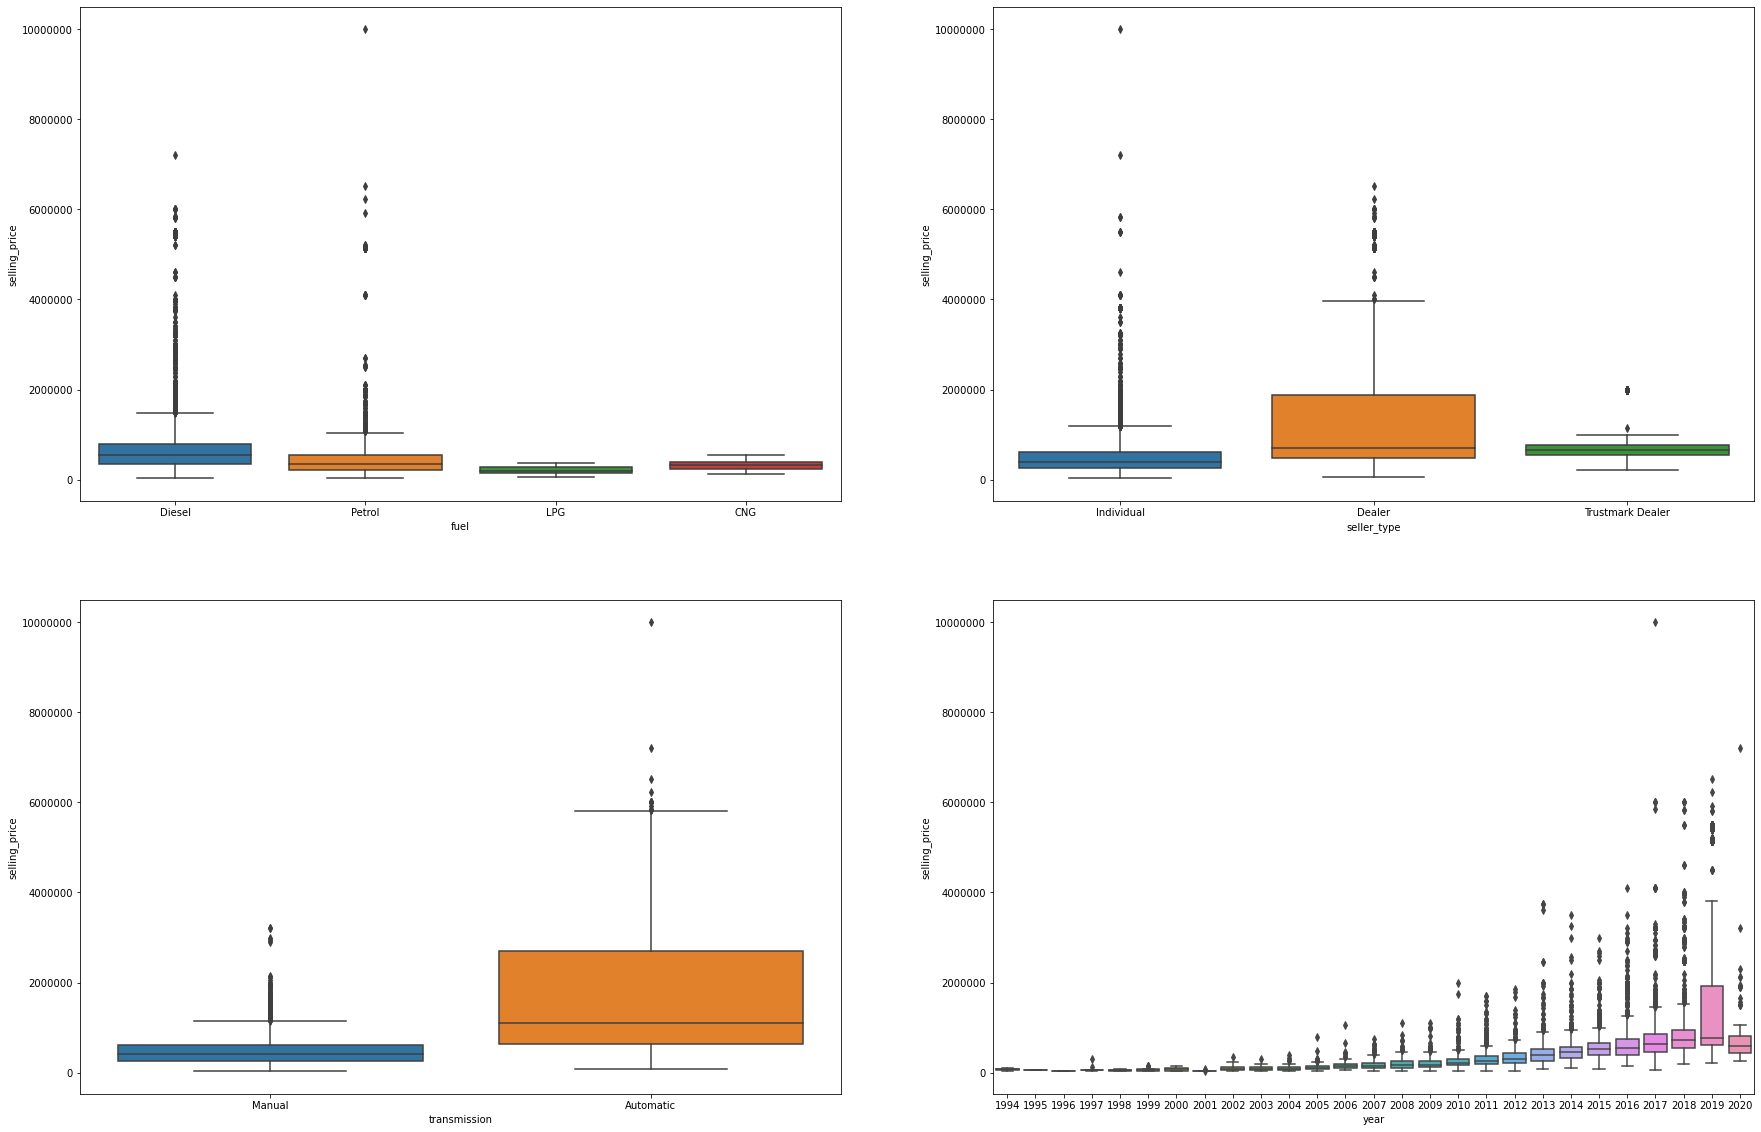

In [13]:
plt.figure(figsize=(30,20))
y='selling_price'
plt.subplot(2,2,1)
sns.boxplot(x='fuel', y=y, data=car_dataframe)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.subplot(2,2,2)
sns.boxplot(x='seller_type', y=y, data=car_dataframe)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.subplot(2,2,3)
sns.boxplot(x='transmission', y=y, data=car_dataframe)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.subplot(2,2,4)
sns.boxplot(x='year', y=y, data=car_dataframe)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

#### Showing the most used brands

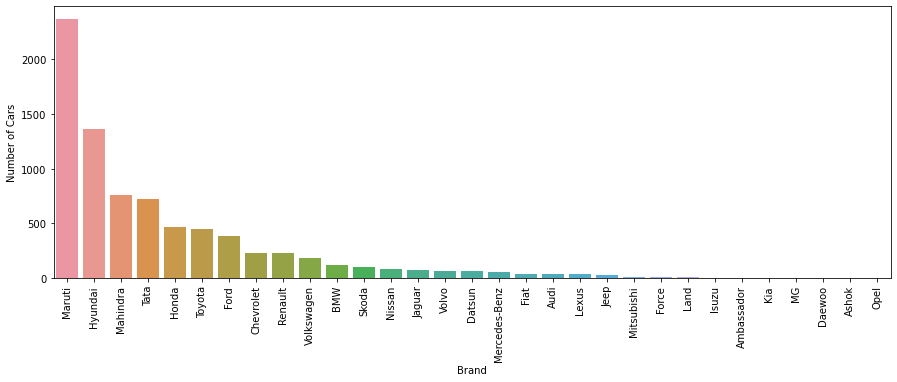

<Figure size 432x288 with 0 Axes>

In [14]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(car_dataframe['brand'], order=pd.value_counts(car_dataframe['brand']).index)
plt1.set(xlabel = 'Brand', ylabel= 'Number of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

Then we will create a new column called car_range and replace each value of selling price depending on value by budget, mid_range and luxury.

In [15]:
car_dataframe['car_range'] = car_dataframe['selling_price'].apply(lambda x: "Budget" if x < 100000 else ("Mid_Range" if 100000 <= x < 300000 else "Luxury" ))

In [16]:
car_dataframe.head(10)

,name,brand,selling_price,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_range
0,Maruti Swift Dzire VDI,Maruti,450000,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Luxury
1,Skoda Rapid 1.5 TDI Ambition,Skoda,370000,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Luxury
2,Honda City 2017-2020 EXi,Honda,158000,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Mid_Range
3,Hyundai i20 Sportz Diesel,Hyundai,225000,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Mid_Range
4,Maruti Swift VXI BSIII,Maruti,130000,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Mid_Range
5,Hyundai Xcent 1.2 VTVT E Plus,Hyundai,440000,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,Luxury
6,Maruti Wagon R LXI DUO BSIII,Maruti,96000,2007,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0,Budget
7,Maruti 800 DX BSII,Maruti,45000,2001,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0,Budget
8,Toyota Etios VXD,Toyota,350000,2011,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0,Luxury
9,Ford Figo Diesel Celebration Edition,Ford,200000,2013,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0,Mid_Range


#### Histogram and boxplots to identifying distributions

Now we plot the features km_driven and year against the selling_price to see the correlation.

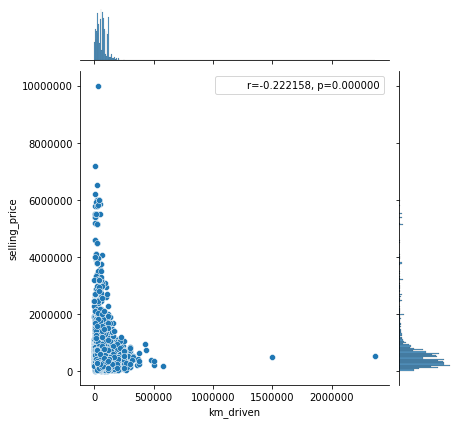

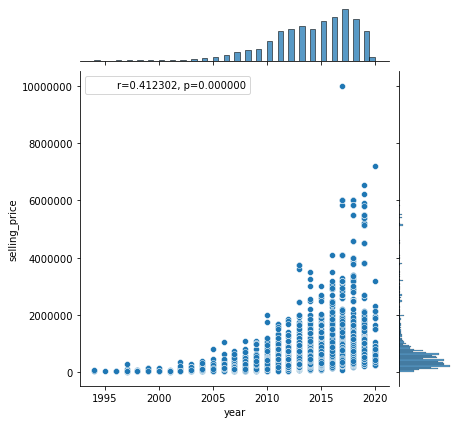

In [17]:
selprice = 'selling_price'
for i in ['km_driven','year']:
    jp = sns.jointplot(x=i, y= selprice, data=car_dataframe[[i,selprice]],height=6)
    r, p = stats.pearsonr(car_dataframe[i], car_dataframe[selprice])
    phantom, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
    jp.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
    jp.ax_joint.ticklabel_format(style='plain', useOffset=False, axis='both')

We can see that there is a negative correlation (negative pearsonr) between price and km_driven. 
It make sense because if the km_driven increases the price decreases. 
When the year increases the price increases also which indicates the positive pearsonr.

### Handling outliers
#### For outliers we are using different methods to point out and make them normally distributed

##### Distribution curve for selling_price

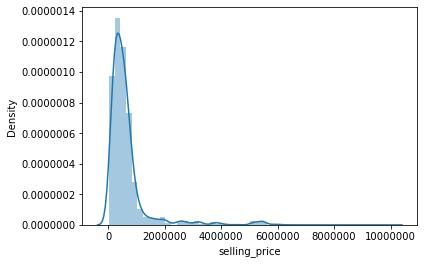

In [18]:
sns.distplot(car_dataframe['selling_price'])
plt.ticklabel_format(useOffset=False, style='plain')

We can see a right or positively skewed distribution. We will try to transform this skewed distribution to a normal distribution. For that we will use the data transformation method log transformation. It replaces each variable x with a log(x). 

First, we create a copy of our dataframe.

In [19]:
final_car_dataframe = car_dataframe.copy()


 mu = 13.00 and sigma = 0.83



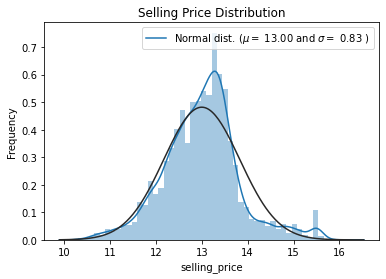

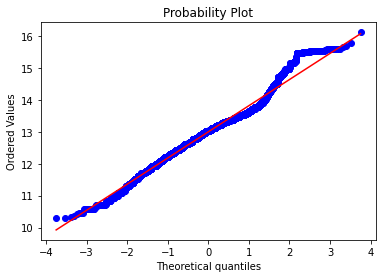

In [20]:
#Apply log transformation on price
final_car_dataframe['selling_price'] = np.log1p(final_car_dataframe['selling_price'])

#Plot the new distribution 
sns.distplot(final_car_dataframe['selling_price'], fit=stats.norm);
plt.ticklabel_format(useOffset=False, style='plain')

# Fitted parameters used by the function
(mu, sigma) = stats.norm.fit(final_car_dataframe['selling_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Selling Price Distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(final_car_dataframe['selling_price'], plot=plt)
plt.show()

In [21]:
print("Skewness: %f" % final_car_dataframe['selling_price'].skew(), "Kurtosis: %f" % final_car_dataframe['selling_price'].kurt())

Skewness: 0.251994 Kurtosis: 1.054117


Skewness is the coefficient of assymmetry and kurtosis shows the heaviness of the tails of a distribution.
We can see that the values of skewness and kurtosis are in an acceptable range (in general it should be between -1 and +1).

#### Distribution curve of  max_power

<AxesSubplot:xlabel='max_power', ylabel='Density'>

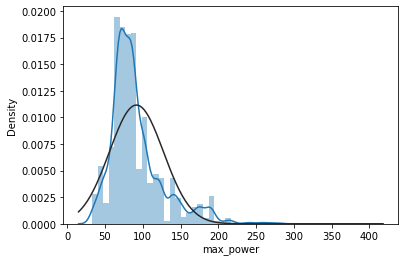

In [22]:
sns.distplot(final_car_dataframe['max_power'], fit=stats.norm)


 mu = 4.45 and sigma = 0.35



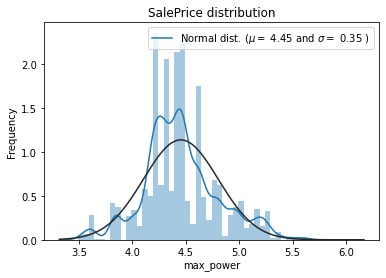

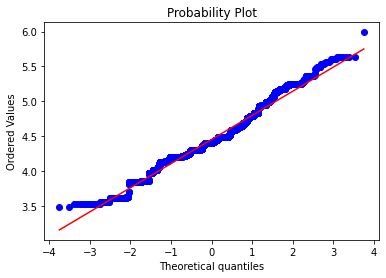

In [23]:
final_car_dataframe['max_power'] = np.log(final_car_dataframe['max_power'])

sns.distplot(final_car_dataframe['max_power'], fit=stats.norm);
plt.ticklabel_format(useOffset=False, style='plain')

(mu, sigma) = stats.norm.fit(final_car_dataframe['max_power'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(final_car_dataframe['max_power'], plot=plt)
plt.show()

In [24]:
print("Skewness: %f" % final_car_dataframe['max_power'].skew(), "Kurtosis: %f" % final_car_dataframe['max_power'].kurt())

Skewness: 0.379046 Kurtosis: 0.553213


#### Handling outliers of km_driven

Now we will visualize km_driven as a boxplot.

<AxesSubplot:xlabel='km_driven'>

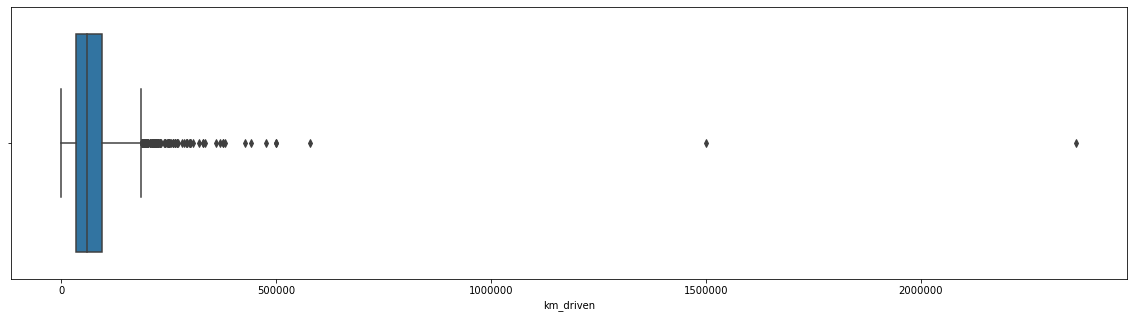

In [25]:
plt.figure(figsize=(20,5))
plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x=final_car_dataframe['km_driven'])

We can see that we have outliers and we will try to remove these outliers or let's say make them normal distributed. At first we have find the interquartile range (IQR), also called the midspread or middle.It is the difference between 75th and 25th percentiles. IQR = Q3-Q1 (IQR=upper-lower quartiles)

In [26]:
q1,q3 = final_car_dataframe['km_driven'].quantile(0.25), final_car_dataframe['km_driven'].quantile(0.75)
iqr = q3-q1

In [27]:
upper_limit, lower_limit = q3 + 1.5 * iqr, q1 - 1.5 * iqr

In [28]:
outliers_km_driven = [x for x in final_car_dataframe['km_driven'] if x < lower_limit or x > upper_limit]

In [29]:
outliers_removed_km_driven = [x for x in final_car_dataframe['km_driven'] if x >= lower_limit and x <= upper_limit]

In [30]:
final_car_dataframe=final_car_dataframe.loc[final_car_dataframe['km_driven'].isin(outliers_removed_km_driven)]

#### Handling the feature engine

<AxesSubplot:xlabel='engine'>

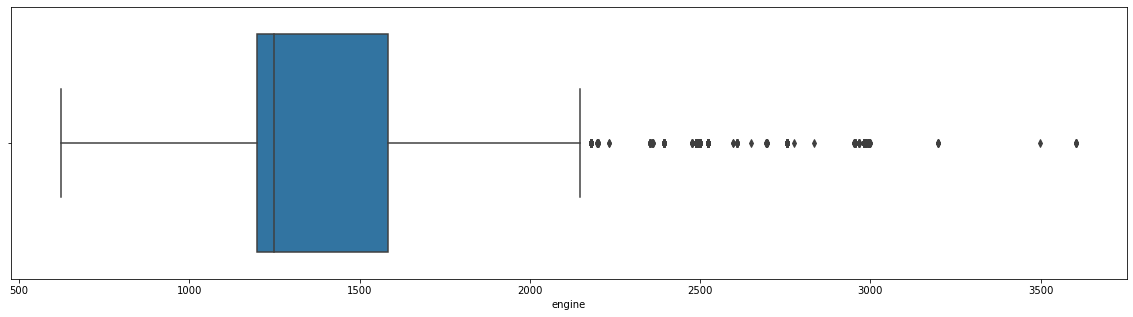

In [31]:
plt.figure(figsize=(20,5))
plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(x=final_car_dataframe['engine'])

In [32]:
print("Skewness: %f" % final_car_dataframe['engine'].skew(), "Kurtosis: %f" % final_car_dataframe['engine'].kurt())

Skewness: 1.179347 Kurtosis: 0.936471


In [33]:
q1,q3 = final_car_dataframe['engine'].quantile(0.25), final_car_dataframe['engine'].quantile(0.75)
iqr = q3-q1

In [34]:
upper_limit, lower_limit = q3 + 1.5 * iqr, q1 - 1.5 * iqr

In [35]:
outliers_engine = [x for x in final_car_dataframe['engine'] if x < lower_limit or x > upper_limit]

In [36]:
outliers_removed_engine = [x for x in final_car_dataframe['engine'] if x >= lower_limit and x <= upper_limit]

In [37]:
final_car_dataframe=final_car_dataframe.loc[final_car_dataframe['engine'].isin(outliers_removed_engine)]

### Converting Categorical Data

##### Label Encoding

We will use pandas.get_dummies for encoding. It creates for each value of a column a new column and returns 0 or 1.

In [38]:
cat_vars = ['fuel', 'seller_type', 'transmission', 'car_range', 'owner']

In [39]:
dummies = pd.get_dummies(final_car_dataframe[cat_vars])

In [40]:
dummies

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,car_range_Budget,car_range_Luxury,car_range_Mid_Range,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
2,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0
8123,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
8124,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
8125,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0


In [41]:
final_car_dataframe = pd.concat([final_car_dataframe, dummies], axis = 1)

In [42]:
final_car_dataframe.drop(cat_vars, axis = 1, inplace = True)

In [43]:
final_car_dataframe = final_car_dataframe.drop(columns=['name','brand'])

# Linear Regression

#### Splitting our data into train and test dataset using train_test_split()

In [44]:
df_train, df_test = train_test_split(final_car_dataframe, train_size = 0.7, test_size = 0.3, random_state = 100)

As we saw above the values vary widely. When we calculate the distances the higher value range starts dominating and
our machine learning algorithm does not work correctly without scaling.

In [45]:
scaler = MinMaxScaler()

In [46]:
num_vars_train = ['max_power', 'km_driven', 'year', 'engine','selling_price']

In [47]:
df_train[num_vars_train]= scaler.fit_transform(df_train[num_vars_train])

We want to predict the car_price so we define selling_price as dependent and the other columns as independent values.

In [48]:
y_train = df_train.pop('selling_price')
X_train = df_train

#### Building a Linear Model

#### Recursive Feature Elimination (RFE)

get_dummies() above created for each value a new column and we ended up in curse of dimensionality, which influences the performance.
With RFE we will find out the most relevant variables and eliminate less important ones.

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
rfe = RFE(lm,n_features_to_select=15)

In [51]:
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', False, 5),
 ('km_driven', False, 6),
 ('mileage', False, 9),
 ('engine', False, 7),
 ('max_power', True, 1),
 ('seats', False, 8),
 ('fuel_CNG', True, 1),
 ('fuel_Diesel', True, 1),
 ('fuel_LPG', False, 2),
 ('fuel_Petrol', True, 1),
 ('seller_type_Dealer', True, 1),
 ('seller_type_Individual', True, 1),
 ('seller_type_Trustmark Dealer', False, 3),
 ('transmission_Automatic', True, 1),
 ('transmission_Manual', True, 1),
 ('car_range_Budget', True, 1),
 ('car_range_Luxury', True, 1),
 ('car_range_Mid_Range', True, 1),
 ('owner_First Owner', False, 4),
 ('owner_Fourth & Above Owner', True, 1),
 ('owner_Second Owner', True, 1),
 ('owner_Test Drive Car', True, 1),
 ('owner_Third Owner', True, 1)]

In [53]:
# Selecting the variables which are in support
sup_col = X_train.columns[rfe.support_]
sup_col

Index(['max_power', 'fuel_CNG', 'fuel_Diesel', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'transmission_Automatic', 'transmission_Manual', 'car_range_Budget',
       'car_range_Luxury', 'car_range_Mid_Range', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [54]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[sup_col]

In [55]:
# Adding a constant variable and build a first fitted model
import statsmodels.api as sm  
X_train_rfe_const = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_const).fit()

#Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1667.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:51:24   Log-Likelihood:                 6698.8
No. Observations:                4638   AIC:                        -1.337e+04
Df Residuals:                    4624   BIC:                        -1.328e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,transmission_Automatic,inf
7,transmission_Manual,inf
8,car_range_Budget,inf
9,car_range_Luxury,inf
10,car_range_Mid_Range,inf
2,fuel_Diesel,51.53
3,fuel_Petrol,51.15
5,seller_type_Individual,5.90
4,seller_type_Dealer,5.74
1,fuel_CNG,2.72


In [57]:
# Dropping features with a high p-value. We have created these three columns with dummies. So we follow the principle 
#remove or keep all.
X_train_rfe_new1 = X_train_rfe.drop(["fuel_Diesel","fuel_Petrol", "fuel_CNG"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_const= sm.add_constant(X_train_rfe_new1)

lm = sm.OLS(y_train,X_train_rfe_const).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     2038.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:51:24   Log-Likelihood:                 6580.7
No. Observations:                4638   AIC:                        -1.314e+04
Df Residuals:                    4627   BIC:                        -1.307e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new1.values, i) for i in range(X_train_rfe_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,transmission_Automatic,inf
4,transmission_Manual,inf
5,car_range_Budget,inf
6,car_range_Luxury,inf
7,car_range_Mid_Range,inf
2,seller_type_Individual,5.79
1,seller_type_Dealer,5.61
0,max_power,1.65
9,owner_Second Owner,1.18
11,owner_Third Owner,1.13


In [59]:
X_train_rfe_new2 = X_train_rfe_new1.drop(["seller_type_Individual","seller_type_Dealer"], axis = 1)

import statsmodels.api as sm  
X_train_rfe_const = sm.add_constant(X_train_rfe_new2)
lm = sm.OLS(y_train,X_train_rfe_const).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2471.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:51:24   Log-Likelihood:                 6522.3
No. Observations:                4638   AIC:                        -1.303e+04
Df Residuals:                    4629   BIC:                        -1.297e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new2.values, i) for i in range(X_train_rfe_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,transmission_Automatic,inf
2,transmission_Manual,inf
3,car_range_Budget,inf
4,car_range_Luxury,inf
5,car_range_Mid_Range,inf
0,max_power,1.62
7,owner_Second Owner,1.15
9,owner_Third Owner,1.12
6,owner_Fourth & Above Owner,1.06
8,owner_Test Drive Car,1.01


In [61]:
#VIF inf means that there is a perfect correlation. So we remove "transmission_Automatic"
X_train_rfe_new3 = X_train_rfe_new2.drop(["transmission_Automatic"], axis = 1)

import statsmodels.api as sm  
X_train_rfe_const = sm.add_constant(X_train_rfe_new3)
lm = sm.OLS(y_train,X_train_rfe_const).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2471.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:51:24   Log-Likelihood:                 6522.3
No. Observations:                4638   AIC:                        -1.303e+04
Df Residuals:                    4629   BIC:                        -1.297e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new3.values, i) for i in range(X_train_rfe_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,car_range_Luxury,24.99
4,car_range_Mid_Range,8.98
2,car_range_Budget,1.82
0,max_power,1.62
1,transmission_Manual,1.28
6,owner_Second Owner,1.15
8,owner_Third Owner,1.12
5,owner_Fourth & Above Owner,1.06
7,owner_Test Drive Car,1.01


Depend on VIF for car_range_Luxury we should remove that, but due to our approach remove or keep all of our variables which were created with dummies and belongs to one feature, i decided here to keep car_range_Luxury. I tried also to remove car_range_Luxury and the VIF was under 5, but R2 was the same. 

#### Residual Analysis of the train data
Lets find out if the error terms are normally distributed.

In [63]:
y_train_price = lm.predict(X_train_rfe_const)

Text(0.5, 0, 'Errors')

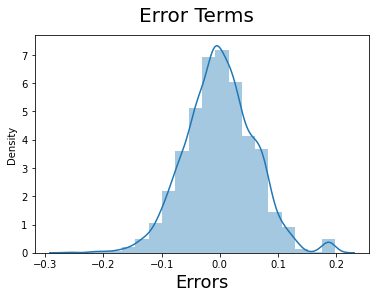

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
y=y_train - y_train_price
sns.distplot((y), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [65]:
# Scaling test_set and then dividing into X and y.
df_test[num_vars_train] = scaler.transform(df_test[num_vars_train])

In [66]:
y_test = df_test.pop('selling_price')
X_test = df_test

In [67]:
# Adding constant
X_test_1 = sm.add_constant(X_test)
X_test_new = X_test_1[X_train_rfe_const.columns]

In [68]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [69]:
# Calculating R2 Score
r2_score(y_test, y_pred)

0.8339338325046773